In [1]:
import sys
import pandas as pd
import matplotlib.pyplot as plt

plt.rcParams.update({
    "text.usetex": True,
    "font.family": "sans-serif",
    "font.sans-serif": ["Helvetica"]})
#plt.style.use('seaborn-poster')
sys.path.append('.')
pd.set_option('display.max_columns', None)

In [2]:
from analysis_support import *

# Halton Sequence, CP-SAT, Single-edge ${\cal V}_k$ cuts

In [3]:
file_pattern = 'halton.cp_sat.single_edge/lazy_prm_bc.BARN.instance_*.json'
# Halton results loading
vanilla_results = collect_deterministic_results(file_pattern)
table = tabulate_deterministic_results(vanilla_results)

Found 1500 result files
Missing results: 0


In [4]:
table

,domain,instance,seed,num_no_goods,num_cusp_no_goods,rgg_V,rgg_E,rgg_expansions,rgg_dispersion,plan_time,verif_time,iterations,safe,holonomic_cost_0,holonomic_cost_k,smooth_cost_0,smooth_cost_k,plan_length
0,BARN,instance_206,8193,0,0,32,269,2,5.550095,0.009859,0.189613,1,True,10.743326,10.743326,10.930761,10.930761,4
1,BARN,instance_043,567,0,1,42,449,3,8.389869,0.028332,0.115101,2,True,10.145640,10.145640,10.163610,10.163610,5
2,BARN,instance_045,42,0,0,32,309,2,5.150895,0.009930,0.102073,1,True,11.474006,11.474006,11.468859,11.468859,5
3,BARN,instance_139,42,2,0,52,570,4,6.957445,0.047298,0.529075,3,True,10.363609,10.278955,10.395590,10.240214,8
4,BARN,instance_149,567,0,0,32,297,2,6.332786,0.008718,0.154994,1,True,10.743326,10.743326,10.930761,10.930761,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1495,BARN,instance_096,567,0,0,32,282,2,5.150895,0.008042,0.081249,1,True,11.474006,11.474006,11.468859,11.468859,5
1496,BARN,instance_294,1337,0,1,42,443,3,6.135879,0.029422,0.086934,2,True,10.386482,10.386482,10.578222,10.578222,5
1497,BARN,instance_197,42,1,1,52,629,4,4.899378,0.046614,0.216442,3,True,9.855114,9.774200,9.803940,9.705942,6
1498,BARN,instance_085,1337,0,0,32,247,2,5.150895,0.007240,0.081140,1,True,11.474006,11.474006,11.468859,11.468859,5


## Analysis

### Halton Sequence Sampling

In [5]:
multiple_iterations = table[table['iterations']>1]
multiple_iterations

,domain,instance,seed,num_no_goods,num_cusp_no_goods,rgg_V,rgg_E,rgg_expansions,rgg_dispersion,plan_time,verif_time,iterations,safe,holonomic_cost_0,holonomic_cost_k,smooth_cost_0,smooth_cost_k,plan_length
1,BARN,instance_043,567,0,1,42,449,3,8.389869,0.028332,0.115101,2,True,10.145640,10.145640,10.163610,10.163610,5
3,BARN,instance_139,42,2,0,52,570,4,6.957445,0.047298,0.529075,3,True,10.363609,10.278955,10.395590,10.240214,8
5,BARN,instance_212,8193,0,1,42,491,3,8.389869,0.029251,0.116817,2,True,9.724754,9.724754,9.685159,9.685159,5
6,BARN,instance_170,567,0,4,72,1149,6,6.291913,0.121955,0.114843,5,True,10.355144,10.355144,10.371319,10.371319,7
7,BARN,instance_120,8193,0,1,42,374,3,5.980918,0.021058,0.461702,2,True,9.840618,9.840618,9.864185,9.864185,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1491,BARN,instance_084,567,0,1,42,433,3,3.913583,0.027032,0.207020,2,True,9.855114,9.855114,9.803940,9.803940,6
1493,BARN,instance_143,8193,3,0,62,844,5,4.363134,0.083820,0.296227,4,True,11.926775,11.560507,12.029108,11.571875,7
1496,BARN,instance_294,1337,0,1,42,443,3,6.135879,0.029422,0.086934,2,True,10.386482,10.386482,10.578222,10.578222,5
1497,BARN,instance_197,42,1,1,52,629,4,4.899378,0.046614,0.216442,3,True,9.855114,9.774200,9.803940,9.705942,6


In [6]:
single_iterations = table[table['iterations']==1]
single_iterations

,domain,instance,seed,num_no_goods,num_cusp_no_goods,rgg_V,rgg_E,rgg_expansions,rgg_dispersion,plan_time,verif_time,iterations,safe,holonomic_cost_0,holonomic_cost_k,smooth_cost_0,smooth_cost_k,plan_length
0,BARN,instance_206,8193,0,0,32,269,2,5.550095,0.009859,0.189613,1,True,10.743326,10.743326,10.930761,10.930761,4
2,BARN,instance_045,42,0,0,32,309,2,5.150895,0.009930,0.102073,1,True,11.474006,11.474006,11.468859,11.468859,5
4,BARN,instance_149,567,0,0,32,297,2,6.332786,0.008718,0.154994,1,True,10.743326,10.743326,10.930761,10.930761,4
10,BARN,instance_108,1,0,0,32,365,2,5.150895,0.012345,0.099096,1,True,10.440148,10.440148,10.420827,10.420827,5
11,BARN,instance_207,1337,0,0,32,267,2,5.550095,0.007311,0.084100,1,True,11.619995,11.619995,11.637189,11.637189,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1490,BARN,instance_011,8193,0,0,32,360,2,6.332786,0.010808,0.191145,1,True,10.596594,10.596594,10.644728,10.644728,5
1492,BARN,instance_222,8193,0,0,32,278,2,5.150895,0.011865,0.117229,1,True,11.474006,11.474006,11.468859,11.468859,5
1494,BARN,instance_226,1,0,0,32,333,2,6.332786,0.010527,0.096093,1,True,10.596594,10.596594,10.644728,10.644728,5
1495,BARN,instance_096,567,0,0,32,282,2,5.150895,0.008042,0.081249,1,True,11.474006,11.474006,11.468859,11.468859,5


In [7]:
multiple_iterations['iterations'].describe()

count    930.000000
mean       3.255914
std        1.972658
min        2.000000
25%        2.000000
50%        2.500000
75%        4.000000
max       19.000000
Name: iterations, dtype: float64

In [8]:
multiple_iterations[['instance', 'seed', 'iterations']].sort_values('iterations', ascending=False).head(20)[['instance', 'seed', 'iterations']]

,instance,seed,iterations
397,instance_069,1337,19
1095,instance_120,567,18
1339,instance_278,1337,18
871,instance_202,1337,16
45,instance_278,1,14
86,instance_064,567,13
825,instance_121,42,12
1162,instance_121,567,11
1174,instance_186,1,11
1034,instance_058,8193,11


In [9]:
multiple_expansions = multiple_iterations.query('rgg_expansions > 1')
multiple_expansions[['instance', 'seed', 'rgg_expansions', 'rgg_expansions', 'rgg_V', 'rgg_E', 'rgg_dispersion']]

,instance,seed,rgg_expansions,rgg_expansions,rgg_V,rgg_E,rgg_dispersion
1,instance_043,567,3,3,42,449,8.389869
3,instance_139,42,4,4,52,570,6.957445
5,instance_212,8193,3,3,42,491,8.389869
6,instance_170,567,6,6,72,1149,6.291913
7,instance_120,8193,3,3,42,374,5.980918
...,...,...,...,...,...,...,...
1491,instance_084,567,3,3,42,433,3.913583
1493,instance_143,8193,5,5,62,844,4.363134
1496,instance_294,1337,3,3,42,443,6.135879
1497,instance_197,42,4,4,52,629,4.899378


In [10]:
multiple_expansions['rgg_V'].describe()

count    930.000000
mean      54.559140
std       19.726582
min       42.000000
25%       42.000000
50%       47.000000
75%       62.000000
max      212.000000
Name: rgg_V, dtype: float64

In [11]:
multiple_expansions['rgg_E'].describe()

count     930.000000
mean      748.430108
std       539.639121
min       309.000000
25%       461.000000
50%       582.000000
75%       836.000000
max      6970.000000
Name: rgg_E, dtype: float64

In [12]:
collision_set = multiple_iterations.query('num_no_goods > 1')
collision_set[['instance', 'seed', 'num_no_goods']]

,instance,seed,num_no_goods
3,instance_139,42,2
8,instance_202,42,4
16,instance_280,1,2
19,instance_185,1,3
23,instance_126,567,3
...,...,...,...
1421,instance_139,8193,2
1448,instance_106,567,3
1468,instance_107,1337,3
1493,instance_143,8193,3


In [13]:
curvature_set = multiple_iterations.query('num_cusp_no_goods > 1')
curvature_set[['instance', 'seed', 'num_cusp_no_goods']]

,instance,seed,num_cusp_no_goods
6,instance_170,567,4
9,instance_109,567,3
18,instance_116,1337,9
19,instance_185,1,6
34,instance_259,8193,3
...,...,...,...
1465,instance_109,42,8
1471,instance_170,1,2
1472,instance_205,567,3
1475,instance_016,1,2


In [14]:
time_data = table[['instance', 'seed', 'plan_time', 'verif_time']]
time_data

,instance,seed,plan_time,verif_time
0,instance_206,8193,0.009859,0.189613
1,instance_043,567,0.028332,0.115101
2,instance_045,42,0.009930,0.102073
3,instance_139,42,0.047298,0.529075
4,instance_149,567,0.008718,0.154994
...,...,...,...,...
1495,instance_096,567,0.008042,0.081249
1496,instance_294,1337,0.029422,0.086934
1497,instance_197,42,0.046614,0.216442
1498,instance_085,1337,0.007240,0.081140


In [15]:
time_data['plan_time'].describe()

count    1500.000000
mean        0.054295
std         0.131958
min         0.005706
25%         0.011368
50%         0.026756
75%         0.047960
max         2.665179
Name: plan_time, dtype: float64

In [16]:
time_data['verif_time'].describe()

count    1500.000000
mean        0.207047
std         0.150326
min         0.021576
25%         0.109610
50%         0.167616
75%         0.253989
max         1.932666
Name: verif_time, dtype: float64

In [17]:
plan_times = [row['plan_time'] for _, row in time_data.iterrows()]
verif_times = [row['verif_time'] for _, row in time_data.iterrows()]

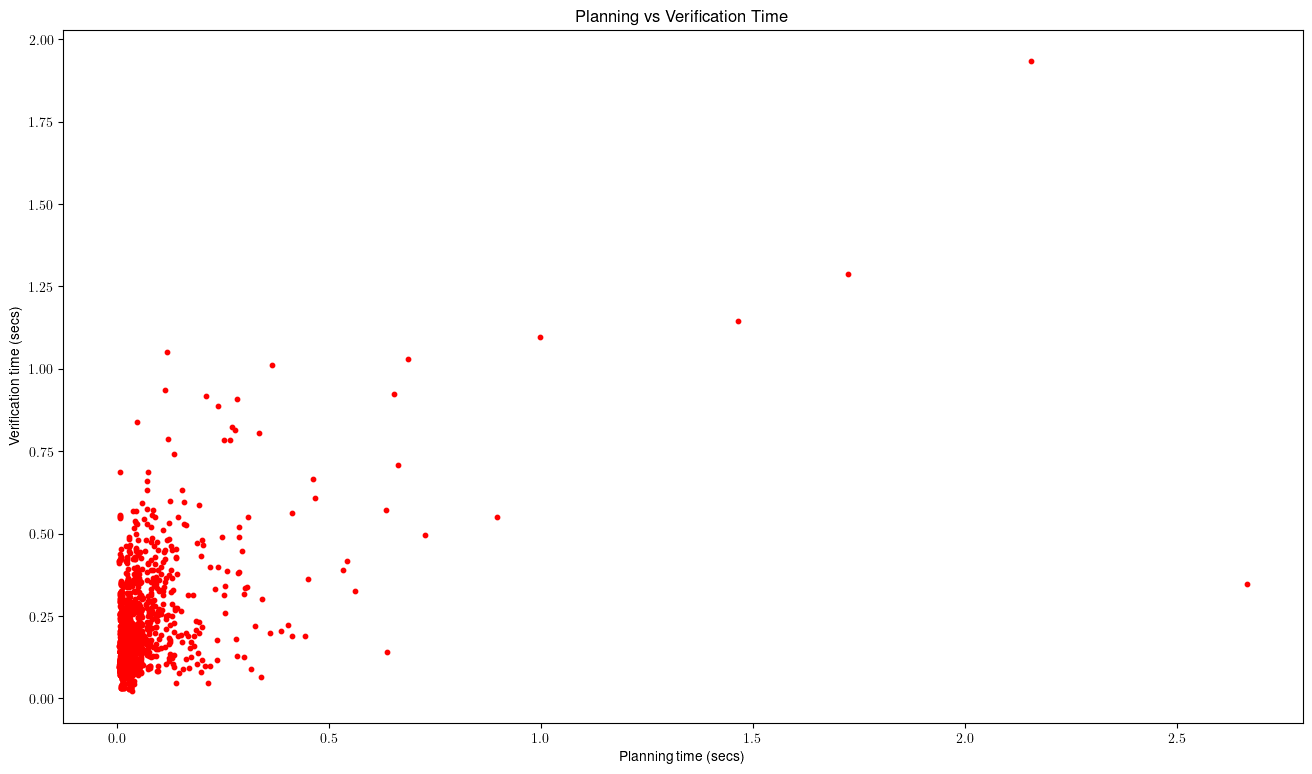

In [18]:
plt.figure(figsize = (16,9))
plt.scatter(plan_times, verif_times, s=10, marker='o', color='red')
#plt.scatter(instance_index, cost_0, s=10, marker='*', color='blue')
plt.title('Planning vs Verification Time')
plt.xlabel('Planning time (secs)')
plt.ylabel('Verification time (secs)')
plt.show()

In [19]:
plan_verif_ratio = time_data['plan_time'] / time_data['verif_time']

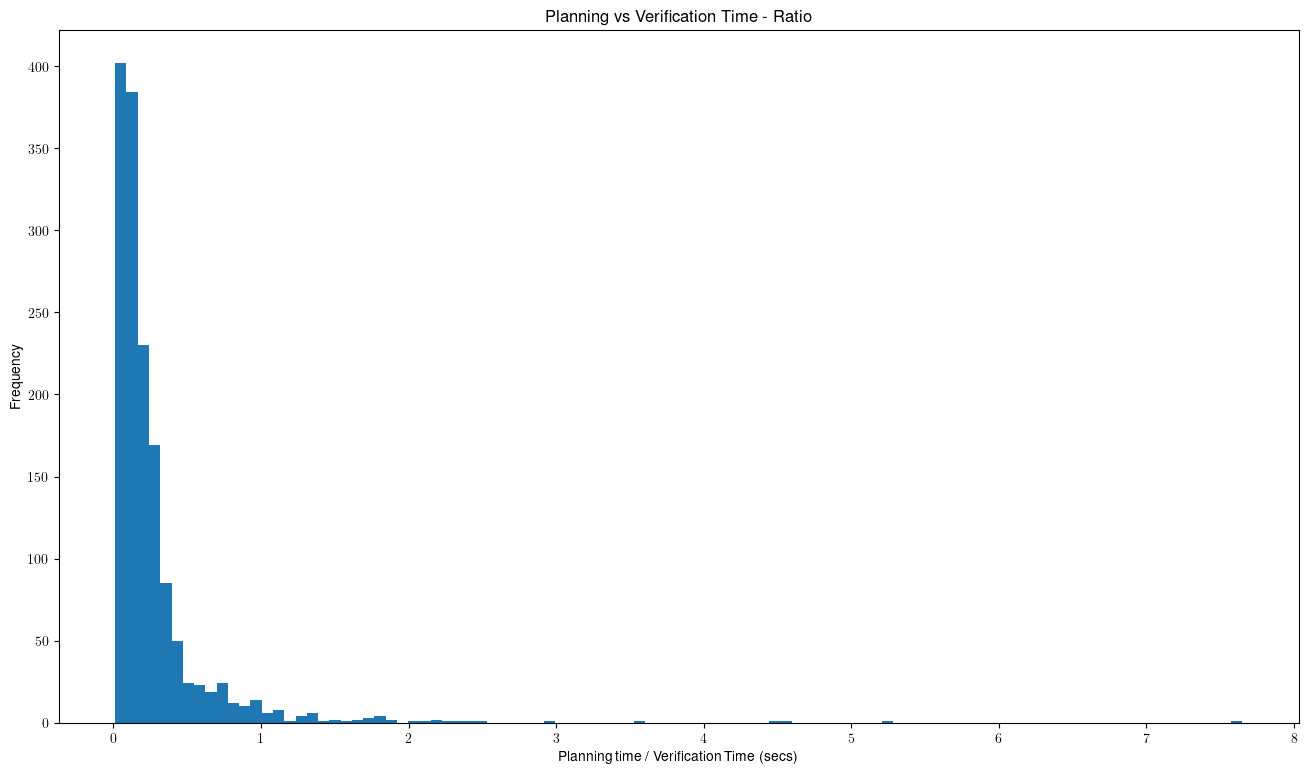

In [20]:
fig, axs = plt.subplots(figsize = (16,9))

axs.hist(plan_verif_ratio, bins=100)


plt.title('Planning vs Verification Time - Ratio')
plt.xlabel('Planning time / Verification Time (secs)')
plt.ylabel('Frequency')
plt.show()

In [21]:
time_data_multiple_iterations = table[['instance', 'seed', 'iterations', 'plan_time', 'verif_time']].query('iterations > 1')
time_data_single_iteration = table[['instance', 'seed', 'iterations', 'plan_time', 'verif_time']].query('iterations == 1')

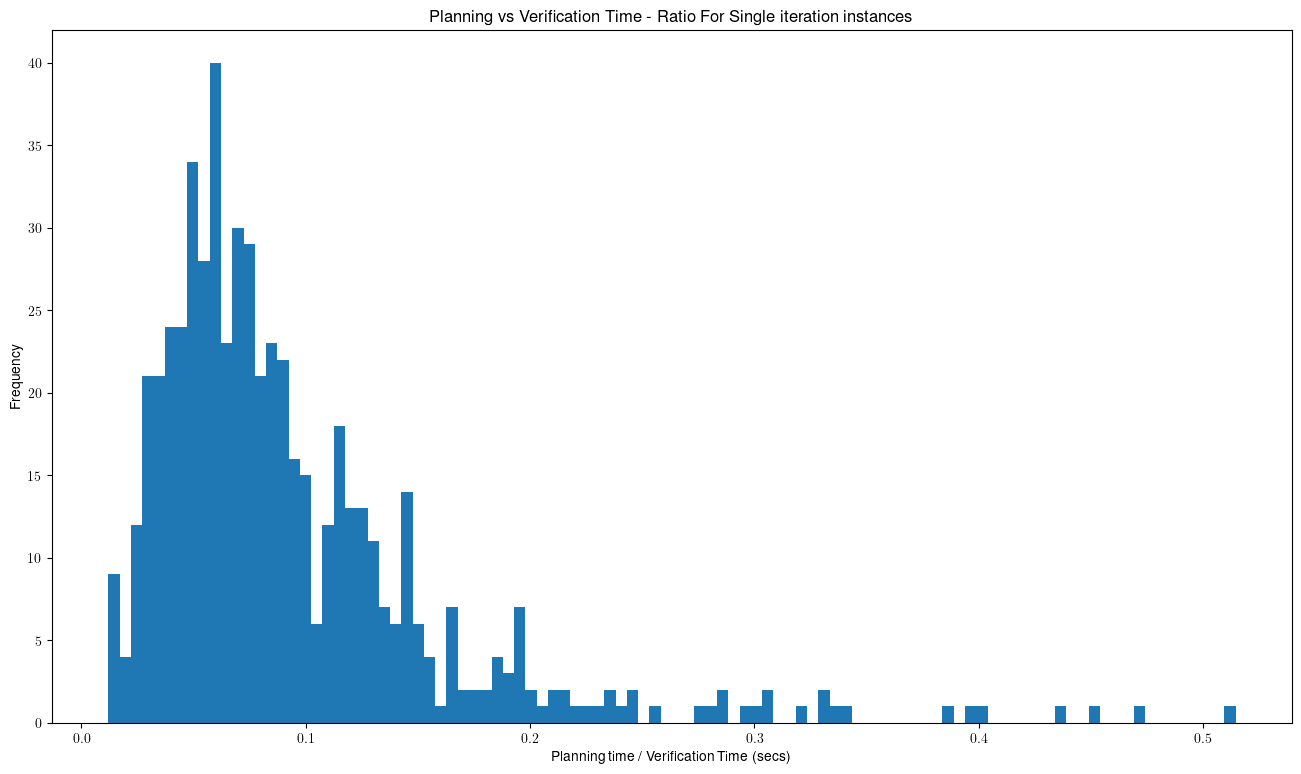

In [22]:
fig, axs = plt.subplots(figsize = (16,9))

plan_verif_ratio = time_data_single_iteration['plan_time'] / time_data_single_iteration['verif_time']
axs.hist(plan_verif_ratio, bins=100)


plt.title('Planning vs Verification Time - Ratio For Single iteration instances')
plt.xlabel('Planning time / Verification Time (secs)')
plt.ylabel('Frequency')
plt.show()

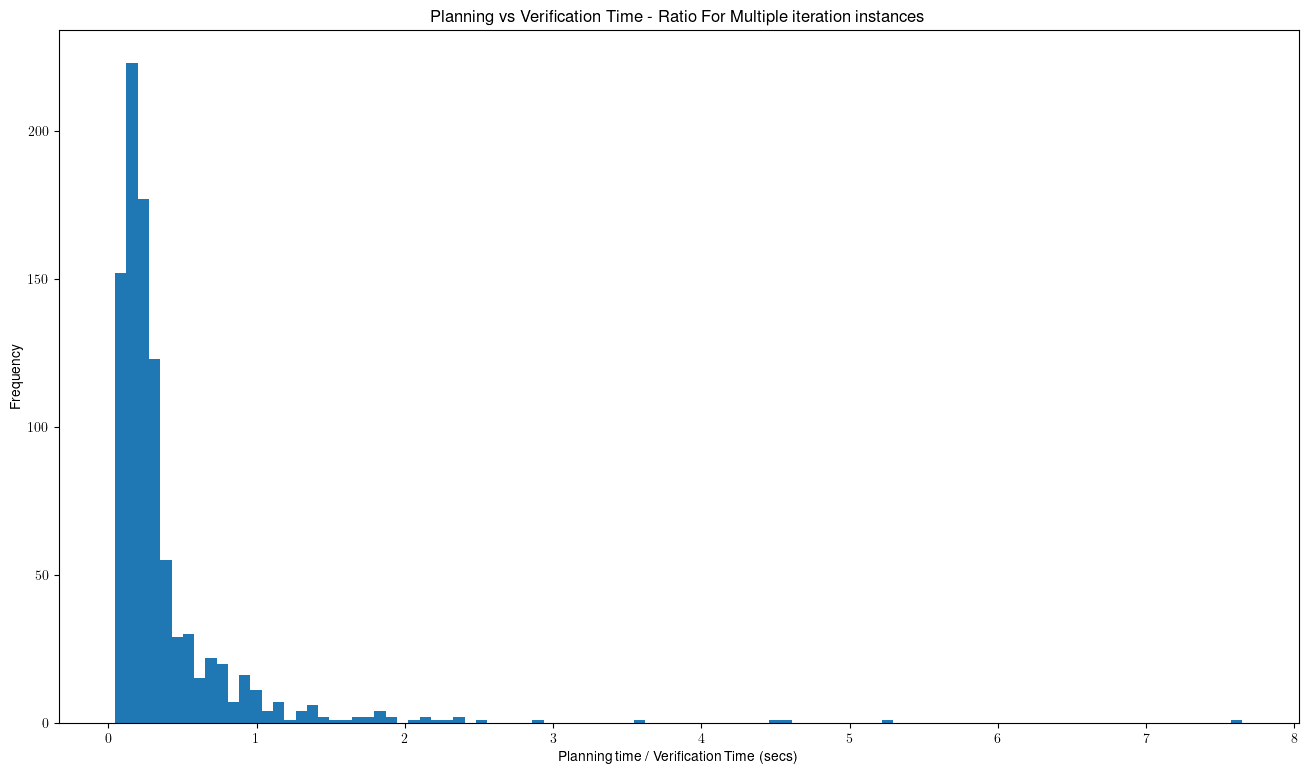

In [23]:
fig, axs = plt.subplots(figsize = (16,9))

plan_verif_ratio = time_data_multiple_iterations['plan_time'] / time_data_multiple_iterations['verif_time']
axs.hist(plan_verif_ratio, bins=100)


plt.title('Planning vs Verification Time - Ratio For Multiple iteration instances')
plt.xlabel('Planning time / Verification Time (secs)')
plt.ylabel('Frequency')
plt.show()

In [24]:
total_time_single_iteration = time_data_single_iteration['plan_time'] + time_data_single_iteration['verif_time']

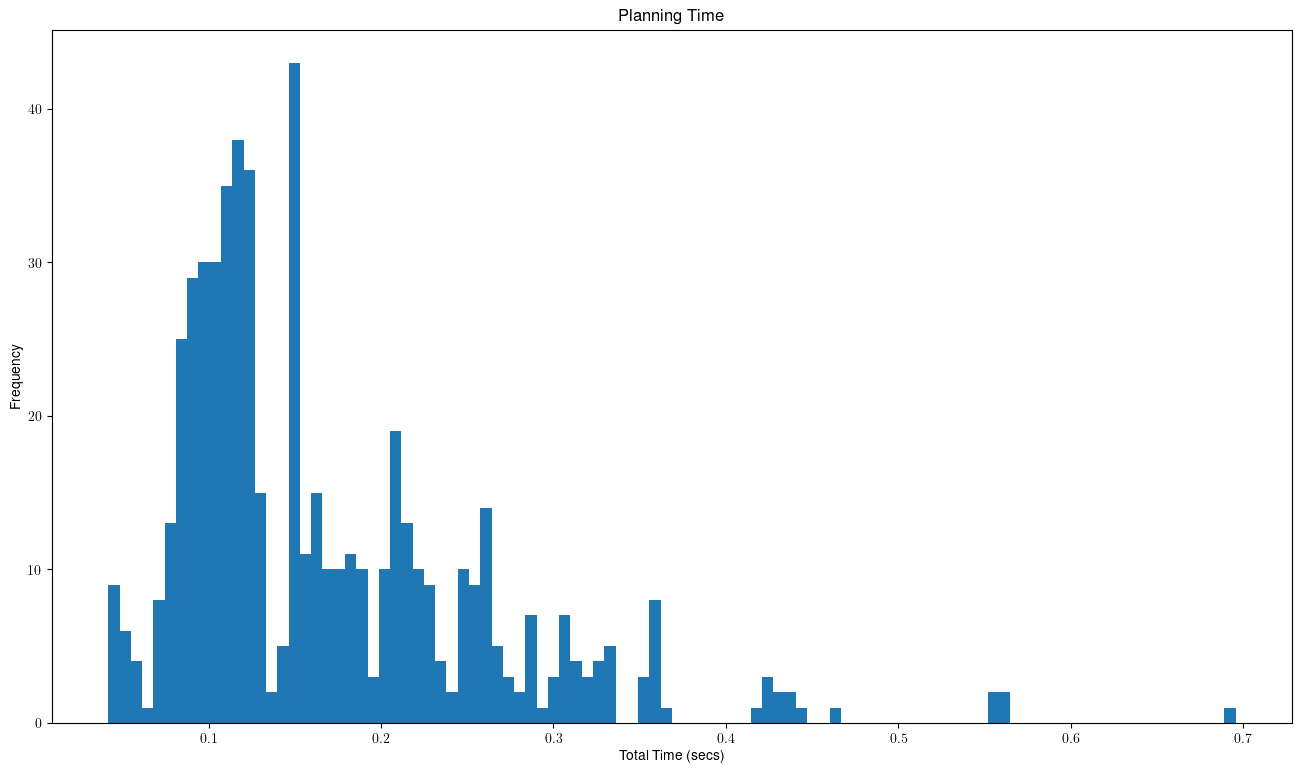

In [25]:
fig, axs = plt.subplots(figsize=(16, 9))

axs.hist(total_time_single_iteration, bins=100)

plt.title('Planning Time')
plt.xlabel('Total Time (secs)')
plt.ylabel('Frequency')
plt.show()

In [26]:
total_time_multiple_iterations = time_data_multiple_iterations['plan_time'] + time_data_multiple_iterations['verif_time']

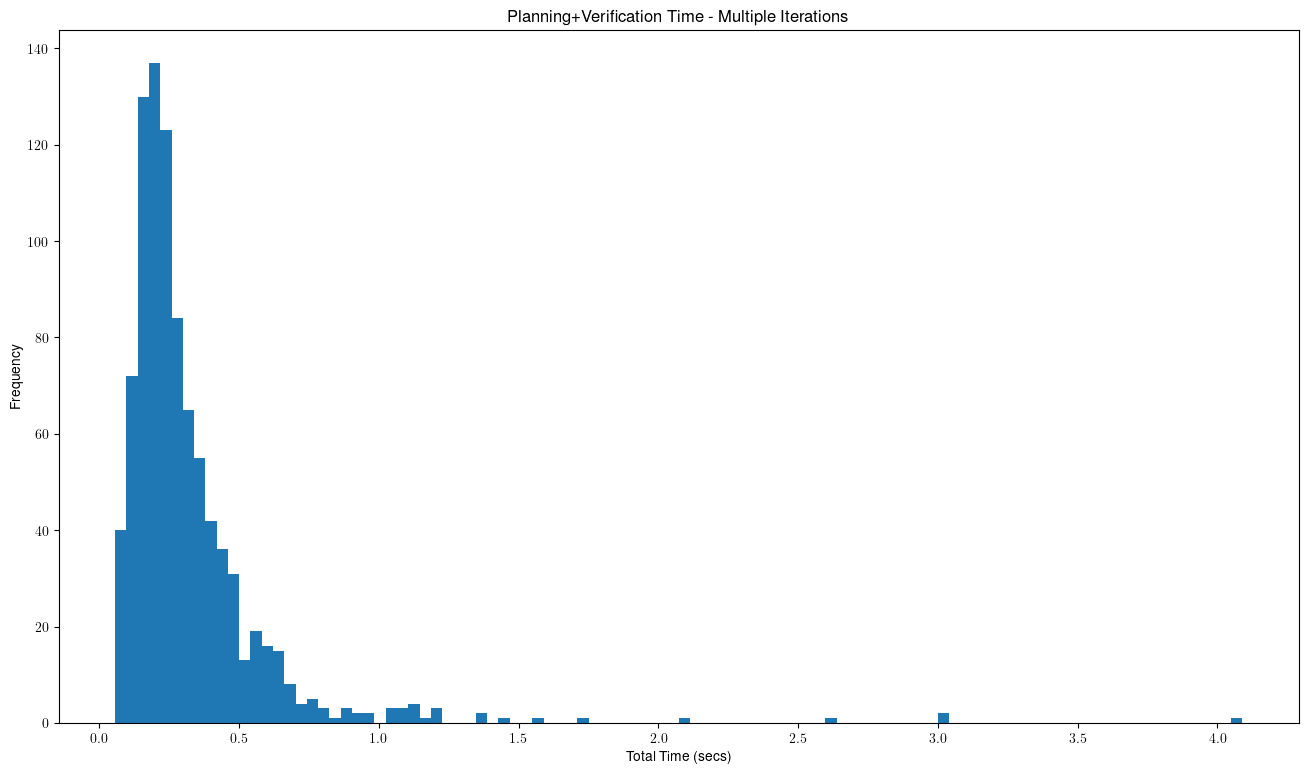

In [27]:
fig, axs = plt.subplots(figsize=(16, 9))

axs.hist(total_time_multiple_iterations, bins=100)

plt.title('Planning+Verification Time - Multiple Iterations')
plt.xlabel('Total Time (secs)')
plt.ylabel('Frequency')
plt.show()

In [28]:
table[['holonomic_cost_k']]

,holonomic_cost_k
0,10.743326
1,10.145640
2,11.474006
3,10.278955
4,10.743326
...,...
1495,11.474006
1496,10.386482
1497,9.774200
1498,11.474006


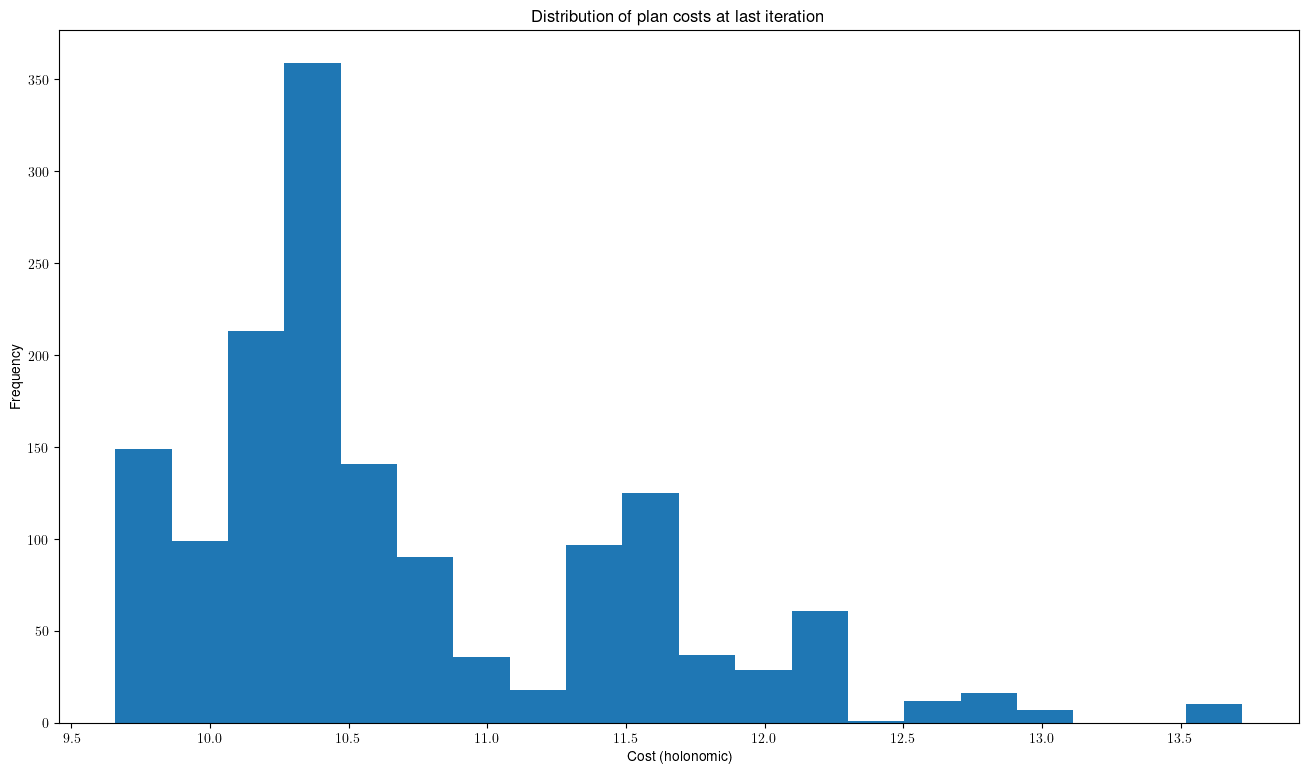

In [29]:
fig, axs = plt.subplots(figsize=(16, 9))

axs.hist(table[['holonomic_cost_k']].to_numpy(), bins=20)

plt.title('Distribution of plan costs at last iteration')
plt.xlabel('Cost (holonomic)')
plt.ylabel('Frequency')
plt.show()

In [30]:
holonomic_cost_diff = multiple_iterations['holonomic_cost_k'] - multiple_iterations['holonomic_cost_0']
holonomic_cost_diff

1       0.000000
3      -0.084654
5       0.000000
6       0.000000
7       0.000000
          ...   
1491    0.000000
1493   -0.366269
1496    0.000000
1497   -0.080914
1499   -0.704170
Length: 930, dtype: float64

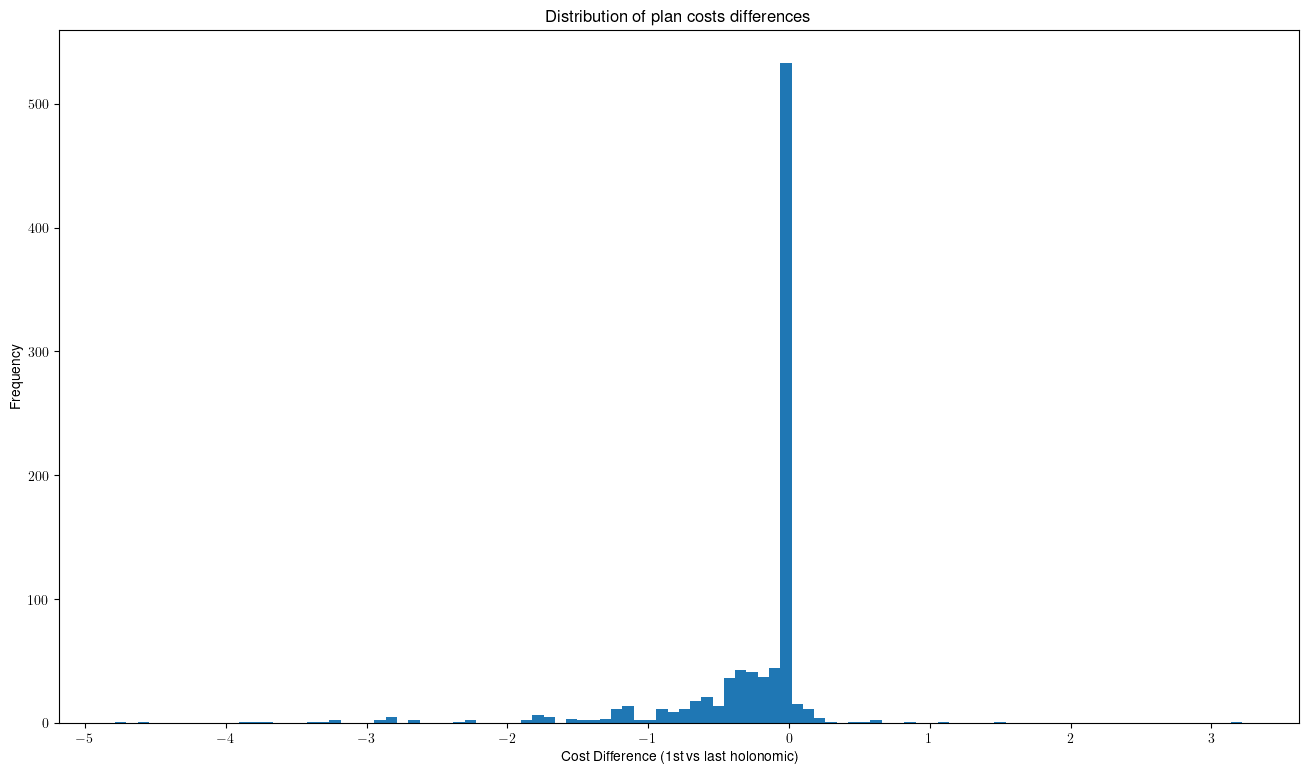

In [31]:
fig, axs = plt.subplots(figsize=(16, 9))

axs.hist(holonomic_cost_diff.to_numpy(), bins=100)

plt.title('Distribution of plan costs differences')
plt.xlabel('Cost Difference (1st vs last holonomic)')
plt.ylabel('Frequency')
plt.show()

In [32]:
smooth_cost_diff = table['smooth_cost_k'] - table['smooth_cost_0']
smooth_cost_diff

0       0.000000
1       0.000000
2       0.000000
3      -0.155377
4       0.000000
          ...   
1495    0.000000
1496    0.000000
1497   -0.097998
1498    0.000000
1499   -0.912774
Length: 1500, dtype: float64

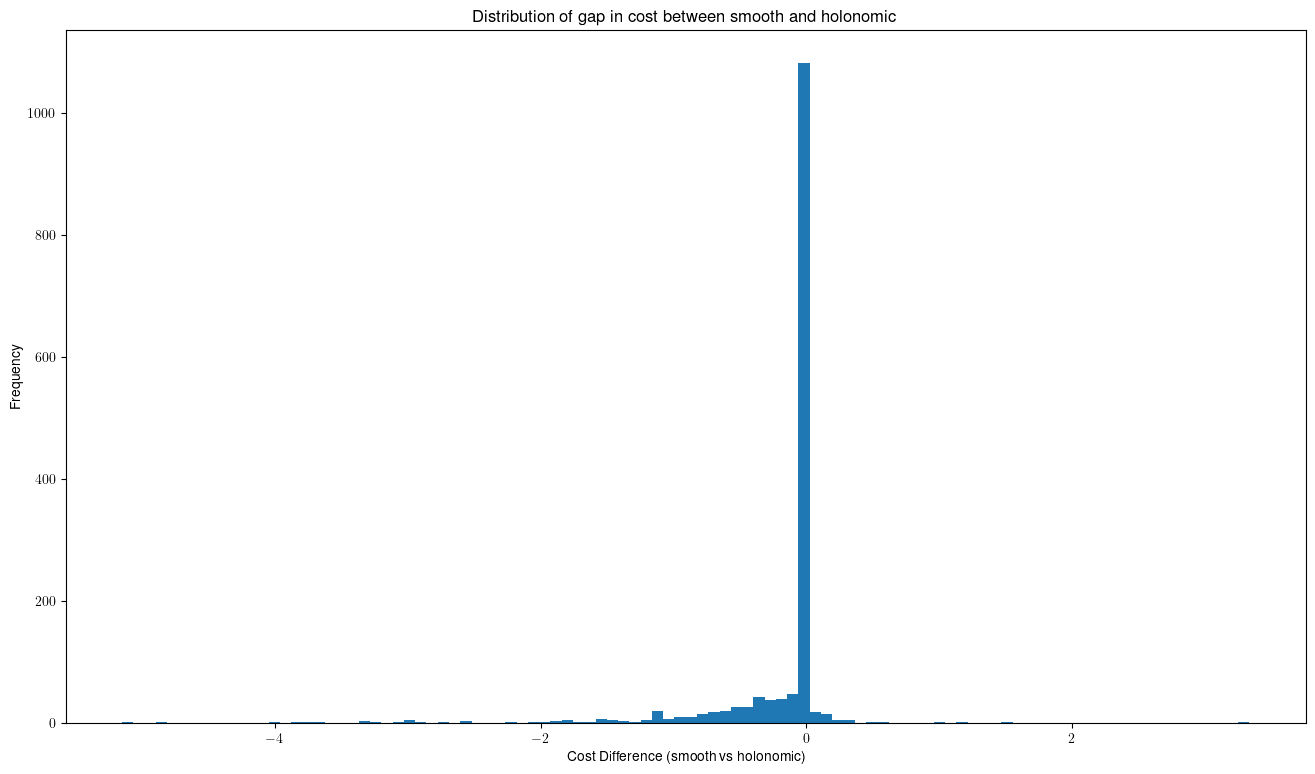

In [33]:
fig, axs = plt.subplots(figsize=(16, 9))

axs.hist(smooth_cost_diff.to_numpy(), bins=100)

plt.title('Distribution of gap in cost between smooth and holonomic')
plt.xlabel('Cost Difference (smooth vs holonomic)')
plt.ylabel('Frequency')
plt.show()

In [34]:
time_vs_plan_len = table[['instance', 'seed', 'plan_time', 'verif_time', 'plan_length']]
time_vs_plan_len

,instance,seed,plan_time,verif_time,plan_length
0,instance_206,8193,0.009859,0.189613,4
1,instance_043,567,0.028332,0.115101,5
2,instance_045,42,0.009930,0.102073,5
3,instance_139,42,0.047298,0.529075,8
4,instance_149,567,0.008718,0.154994,4
...,...,...,...,...,...
1495,instance_096,567,0.008042,0.081249,5
1496,instance_294,1337,0.029422,0.086934,5
1497,instance_197,42,0.046614,0.216442,6
1498,instance_085,1337,0.007240,0.081140,5


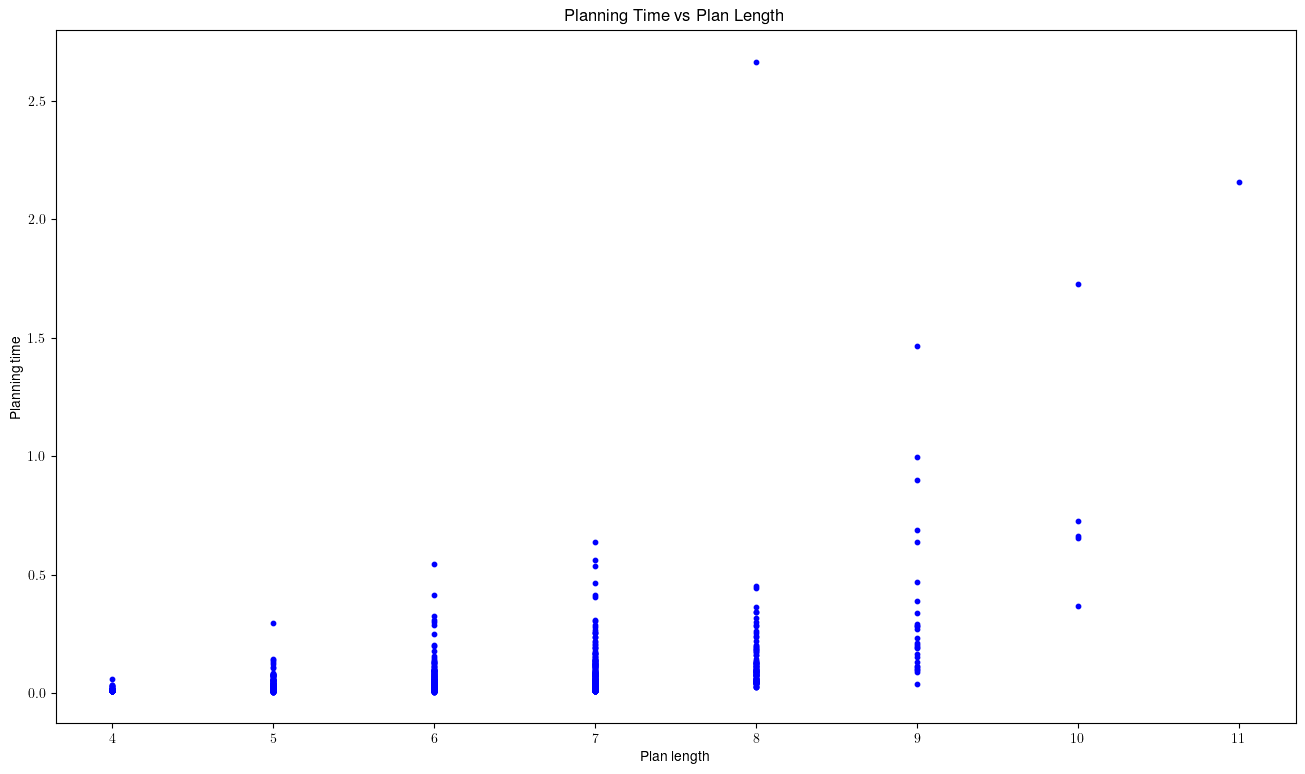

In [35]:
plt.figure(figsize = (16,9))
plan_times = time_vs_plan_len['plan_time'].to_numpy()
plan_length = time_vs_plan_len['plan_length'].to_numpy()
plt.scatter(plan_length, plan_times, s=10, marker='o', color='blue')
plt.title('Planning Time vs Plan Length')
plt.xlabel('Plan length')
plt.ylabel('Planning time')
plt.show()

In [36]:
time_vs_no_goods = table[['instance', 'seed', 'plan_time', 'verif_time', 'num_no_goods', 'num_cusp_no_goods']]
time_vs_no_goods

,instance,seed,plan_time,verif_time,num_no_goods,num_cusp_no_goods
0,instance_206,8193,0.009859,0.189613,0,0
1,instance_043,567,0.028332,0.115101,0,1
2,instance_045,42,0.009930,0.102073,0,0
3,instance_139,42,0.047298,0.529075,2,0
4,instance_149,567,0.008718,0.154994,0,0
...,...,...,...,...,...,...
1495,instance_096,567,0.008042,0.081249,0,0
1496,instance_294,1337,0.029422,0.086934,0,1
1497,instance_197,42,0.046614,0.216442,1,1
1498,instance_085,1337,0.007240,0.081140,0,0


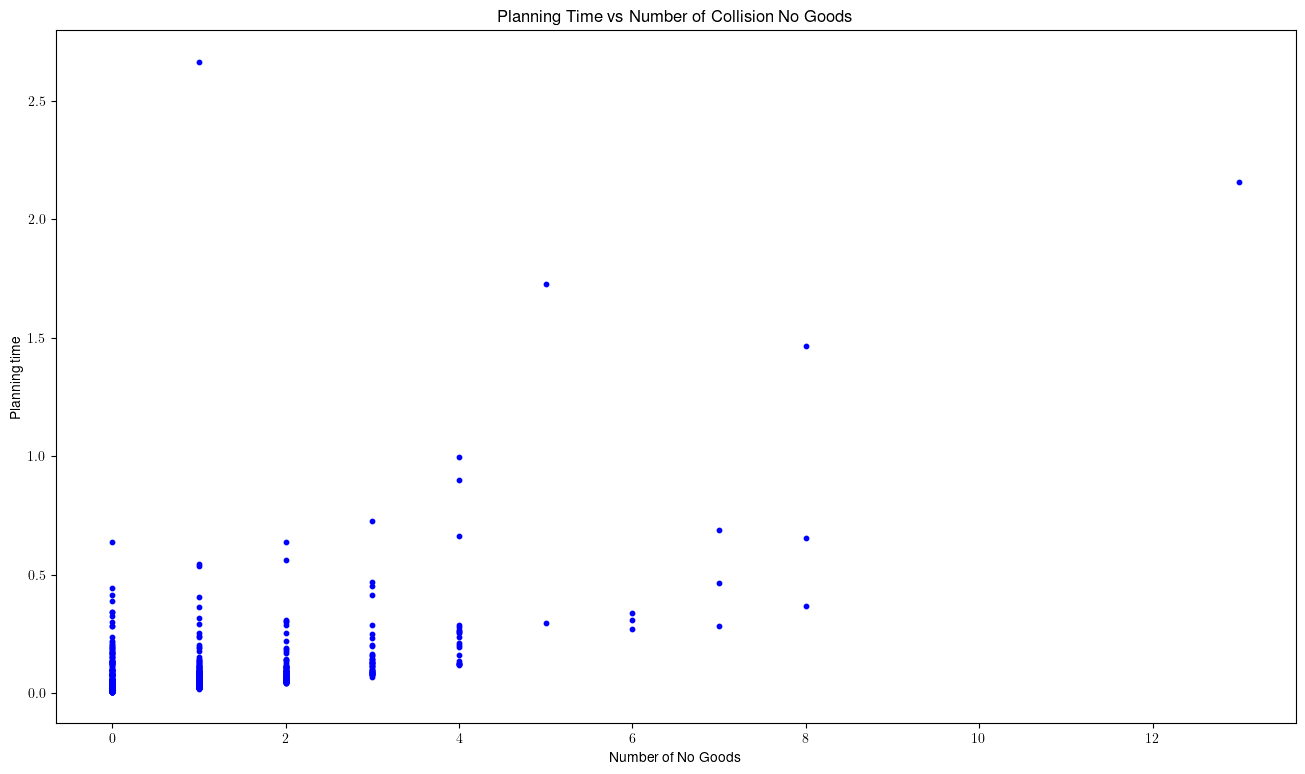

In [37]:
plt.figure(figsize = (16,9))
plan_times = time_vs_no_goods['plan_time'].to_numpy()
number_of_nogoods = time_vs_no_goods['num_no_goods'].to_numpy()
plt.scatter(number_of_nogoods, plan_times, s=10, marker='o', color='blue')
plt.title('Planning Time vs Number of Collision No Goods')
plt.xlabel('Number of No Goods')
plt.ylabel('Planning time')
plt.show()

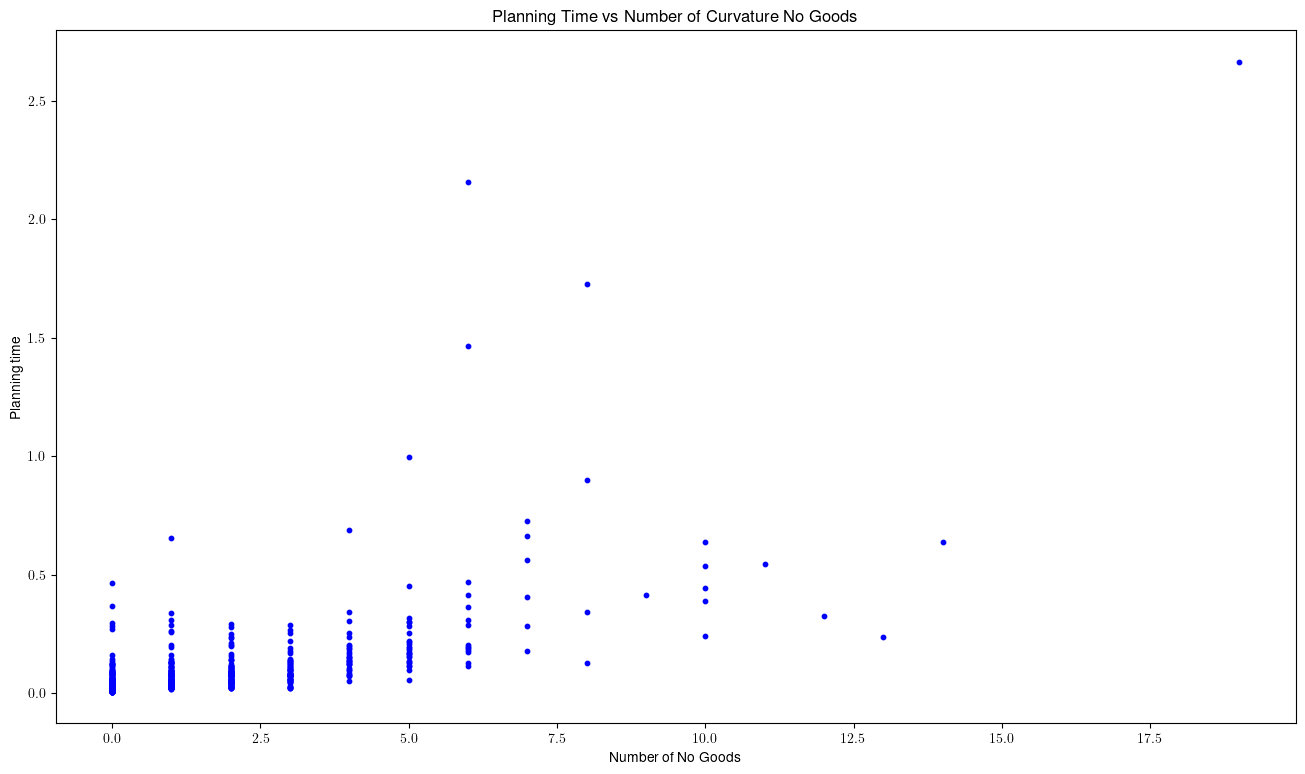

In [38]:
plt.figure(figsize = (16,9))
plan_times = time_vs_no_goods['plan_time'].to_numpy()
number_of_nogoods = time_vs_no_goods['num_cusp_no_goods'].to_numpy()
plt.scatter(number_of_nogoods, plan_times, s=10, marker='o', color='blue')
plt.title('Planning Time vs Number of Curvature No Goods')
plt.xlabel('Number of No Goods')
plt.ylabel('Planning time')
plt.show()

In [39]:
time_breakpoints = [0.005, 0.01, 0.05, 0.1, 0.5, 1.0, 5.0, 10.0, 50.0, 100.0, 500.0]

In [40]:
coverage_at_breakpoint = np.zeros(len(time_breakpoints), dtype=int)

for i in range(len(plan_times)):
    for j in range(len(time_breakpoints)):
        if plan_times[i] <= time_breakpoints[j]:
            coverage_at_breakpoint[j] += 1
print("[{}]".format(", ".join(str(v) for v in coverage_at_breakpoint)))

[0, 271, 1150, 1338, 1485, 1496, 1500, 1500, 1500, 1500, 1500]


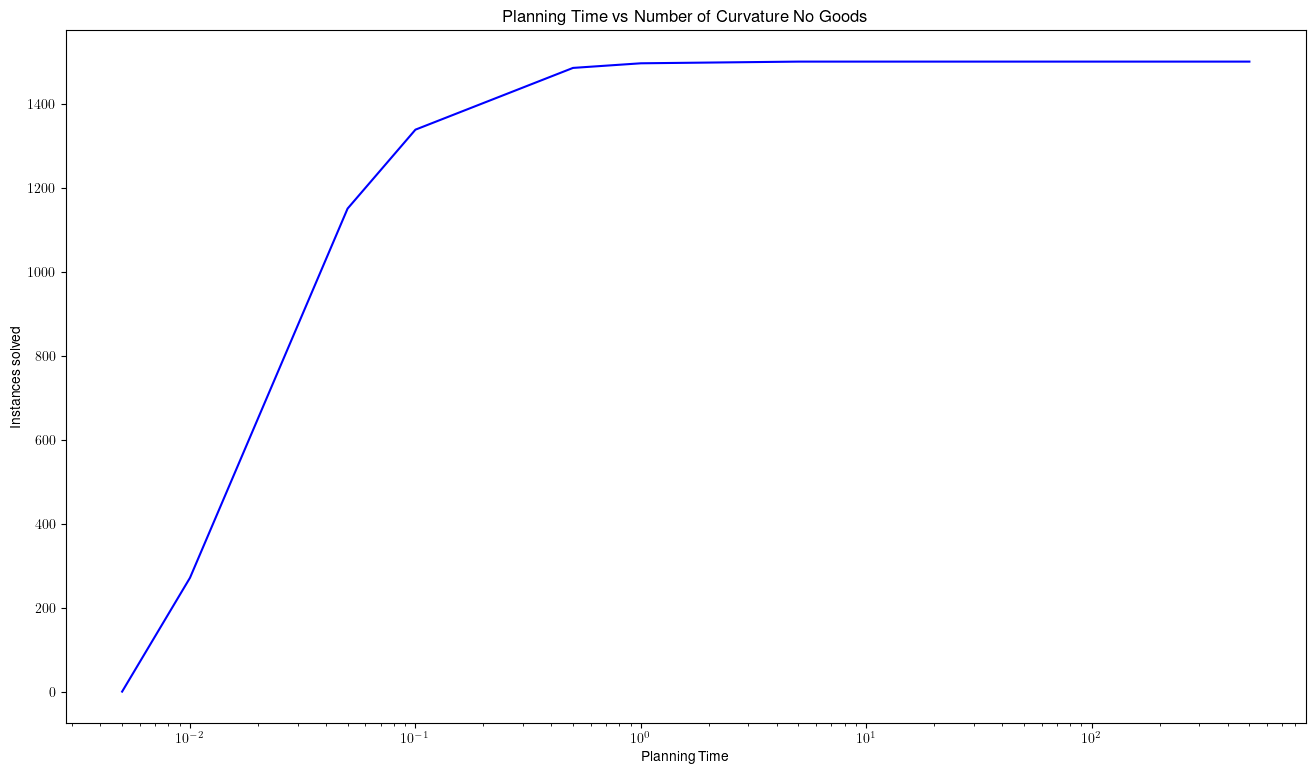

In [41]:
plt.figure(figsize = (16,9))
plt.plot(time_breakpoints, coverage_at_breakpoint, color='blue')
plt.title('Planning Time vs Number of Curvature No Goods')
plt.xlabel('Planning Time')
plt.xscale('log')
plt.ylabel('Instances solved')
plt.show()

#### Analysis w.r.t. BARN Metrics

In [42]:
file_pattern = '../BARN/instance*.json'
metadata_BARN = collect_instance_metadata(file_pattern)
metadata_table = tabulate_instance_metadata(metadata_BARN)

Found metadata for 300 instances


In [43]:
total_time_table = table[['instance', 'seed', 'iterations', 'num_no_goods', 'num_cusp_no_goods', 'plan_time', 'verif_time']]

In [44]:
total_time_table['total_time'] = total_time_table['plan_time'] + total_time_table['verif_time']

/tmp/ipykernel_12725/4224517660.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  total_time_table['total_time'] = total_time_table['plan_time'] + total_time_table['verif_time']


In [45]:
total_time_table

,instance,seed,iterations,num_no_goods,num_cusp_no_goods,plan_time,verif_time,total_time
0,instance_206,8193,1,0,0,0.009859,0.189613,0.199472
1,instance_043,567,2,0,1,0.028332,0.115101,0.143434
2,instance_045,42,1,0,0,0.009930,0.102073,0.112003
3,instance_139,42,3,2,0,0.047298,0.529075,0.576373
4,instance_149,567,1,0,0,0.008718,0.154994,0.163712
...,...,...,...,...,...,...,...,...
1495,instance_096,567,1,0,0,0.008042,0.081249,0.089291
1496,instance_294,1337,2,0,1,0.029422,0.086934,0.116356
1497,instance_197,42,3,1,1,0.046614,0.216442,0.263056
1498,instance_085,1337,1,0,0,0.007240,0.081140,0.088380


In [46]:
metadata_table

,instance,distance_closest_obstacle,average_visibility,dispersion,characterisitic_dimensions,tortuosity
0,instance_157,1.765225,4.795159,4.974359,2.196642,1.524747
1,instance_142,3.144283,8.739424,2.687500,8.123383,1.126505
2,instance_040,4.737938,10.563817,2.000000,10.798692,1.077837
3,instance_197,1.937390,5.563366,4.709677,3.306763,1.065729
4,instance_296,1.560408,4.109565,4.342857,1.518347,1.248066
...,...,...,...,...,...,...
295,instance_194,1.235520,3.674314,4.437500,0.928998,1.099499
296,instance_252,3.160814,7.436131,3.225806,5.575897,1.054628
297,instance_271,1.813977,4.232665,4.285714,2.477100,1.183793
298,instance_272,1.359000,4.062666,4.193548,1.254822,1.037314


In [47]:
metadata_cmp = total_time_table.set_index('instance').join(metadata_table.set_index('instance'), on=['instance'])
metadata_cmp

,seed,iterations,num_no_goods,num_cusp_no_goods,plan_time,verif_time,total_time,distance_closest_obstacle,average_visibility,dispersion,characterisitic_dimensions,tortuosity
instance,,,,,,,,,,,,
instance_206,8193,1,0,0,0.009859,0.189613,0.199472,1.438338,4.977141,4.210526,1.272509,1.240162
instance_043,567,2,0,1,0.028332,0.115101,0.143434,2.182207,5.580485,5.375000,3.670876,1.237019
instance_045,42,1,0,0,0.009930,0.102073,0.112003,2.700401,6.759326,4.514286,4.946425,1.291418
instance_139,42,3,2,0,0.047298,0.529075,0.576373,2.336406,6.110083,6.129032,3.674571,1.057133
instance_149,567,1,0,0,0.008718,0.154994,0.163712,2.227339,5.069773,4.388889,3.683616,1.336679
...,...,...,...,...,...,...,...,...,...,...,...,...
instance_096,567,1,0,0,0.008042,0.081249,0.089291,2.296759,5.346198,5.935484,3.605469,1.132114
instance_294,1337,2,0,1,0.029422,0.086934,0.116356,1.710773,4.474594,4.914286,2.381581,1.237575
instance_197,42,3,1,1,0.046614,0.216442,0.263056,1.937390,5.563366,4.709677,3.306763,1.065729


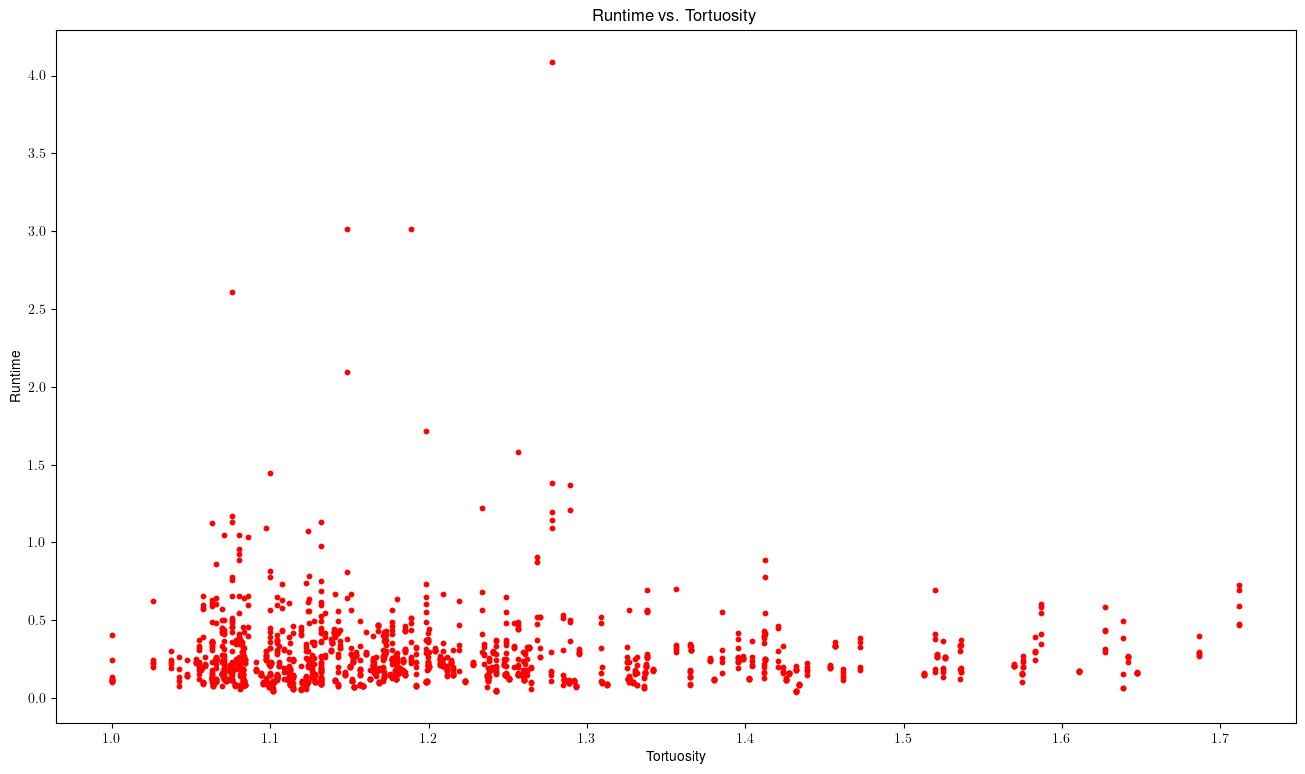

In [48]:
plt.figure(figsize = (16,9))
plt.scatter(metadata_cmp['tortuosity'], metadata_cmp['plan_time'] + metadata_cmp['verif_time'],  s=10, marker='o', color='red')
#plt.scatter(instance_index, cost_0, s=10, marker='*', color='blue')
plt.title('Runtime vs. Tortuosity')
plt.xlabel('Tortuosity')
plt.ylabel('Runtime')
plt.show()

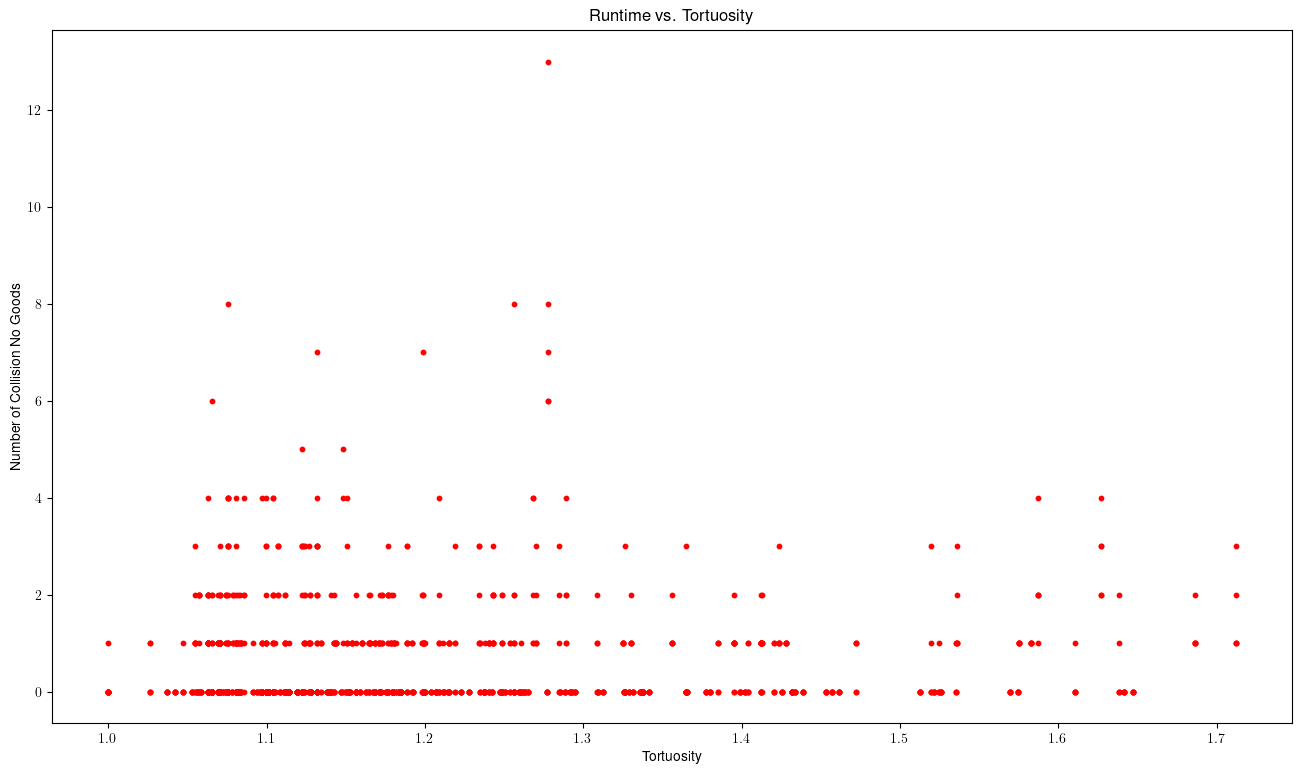

In [49]:
plt.figure(figsize = (16,9))
plt.scatter(metadata_cmp['tortuosity'], metadata_cmp['num_no_goods'],  s=10, marker='o', color='red')
#plt.scatter(instance_index, cost_0, s=10, marker='*', color='blue')
plt.title('Runtime vs. Tortuosity')
plt.xlabel('Tortuosity')
plt.ylabel('Number of Collision No Goods')
plt.show()

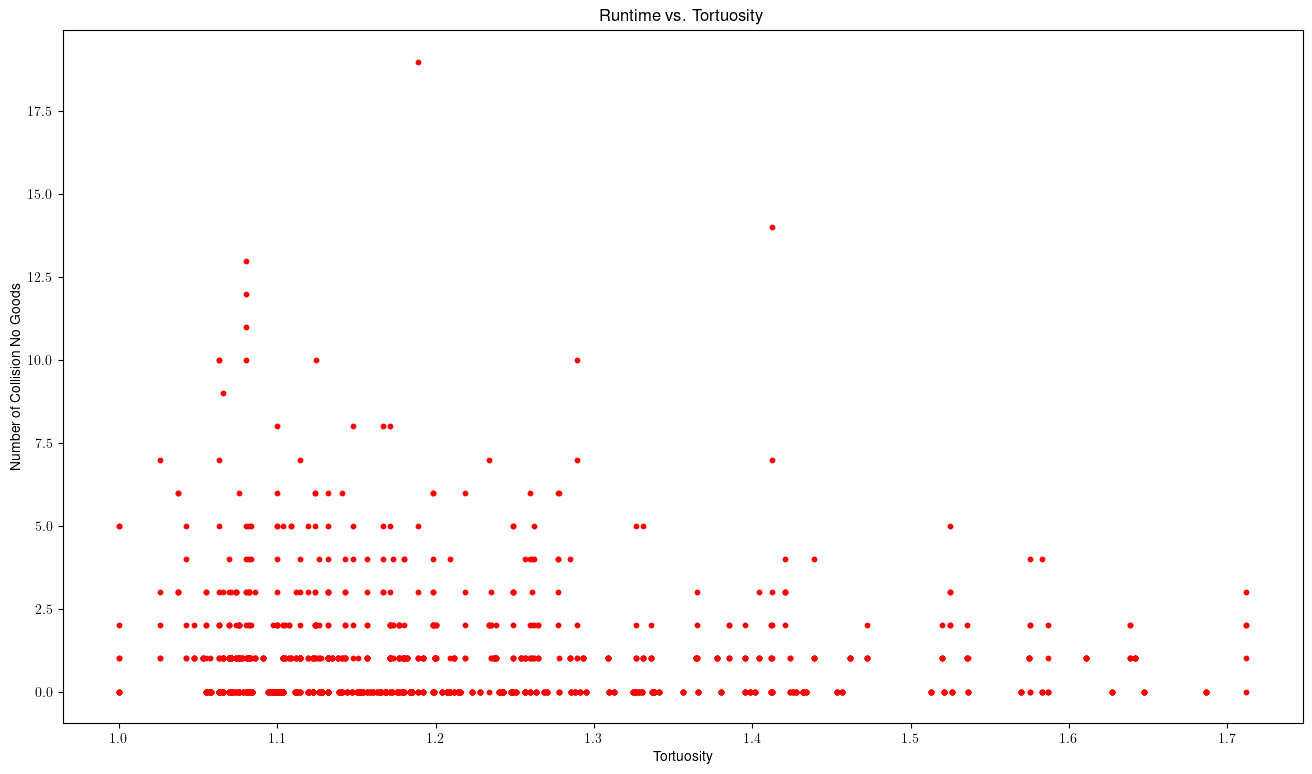

In [50]:
plt.figure(figsize = (16,9))
plt.scatter(metadata_cmp['tortuosity'], metadata_cmp['num_cusp_no_goods'],  s=10, marker='o', color='red')
#plt.scatter(instance_index, cost_0, s=10, marker='*', color='blue')
plt.title('Runtime vs. Tortuosity')
plt.xlabel('Tortuosity')
plt.ylabel('Number of Collision No Goods')
plt.show()